In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# chargement des donnees du fichier Salaire_employes.csv

In [62]:
donnees=pd.read_csv('Salaire_employes.csv')
x=donnees.iloc[:,:-1].values # 
x.shape

(30, 1)

In [63]:
y=donnees.iloc[:,-1].values
y.shape

(30,)

In [64]:
y=y.reshape(y.shape[0],1)
y.shape

(30, 1)

# observation du dataset

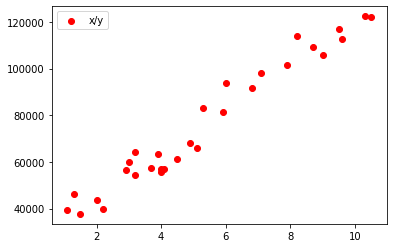

In [77]:
plt.scatter(x,y,c='r')
plt.legend(["x/y"],loc='best')

# Definition du MODELE

# Parametre F= X.O

In [78]:
# x est ' une matrice' que l'on doit concatener avec une colone rempli de 1
X=np.hstack((x,np.ones(x.shape)))
X


array([[ 1.1,  1. ],
       [ 1.3,  1. ],
       [ 1.5,  1. ],
       [ 2. ,  1. ],
       [ 2.2,  1. ],
       [ 2.9,  1. ],
       [ 3. ,  1. ],
       [ 3.2,  1. ],
       [ 3.2,  1. ],
       [ 3.7,  1. ],
       [ 3.9,  1. ],
       [ 4. ,  1. ],
       [ 4. ,  1. ],
       [ 4.1,  1. ],
       [ 4.5,  1. ],
       [ 4.9,  1. ],
       [ 5.1,  1. ],
       [ 5.3,  1. ],
       [ 5.9,  1. ],
       [ 6. ,  1. ],
       [ 6.8,  1. ],
       [ 7.1,  1. ],
       [ 7.9,  1. ],
       [ 8.2,  1. ],
       [ 8.7,  1. ],
       [ 9. ,  1. ],
       [ 9.5,  1. ],
       [ 9.6,  1. ],
       [10.3,  1. ],
       [10.5,  1. ]])

In [79]:
def model(X,O):
    return X.dot(O)

In [80]:
# calcul des theta
O=np.random.randn(2,1)

In [81]:
# teste du modele
model(X,O)

array([[-0.1689948 ],
       [-0.09797641],
       [-0.02695803],
       [ 0.15058794],
       [ 0.22160633],
       [ 0.47017069],
       [ 0.50567988],
       [ 0.57669827],
       [ 0.57669827],
       [ 0.75424424],
       [ 0.82526263],
       [ 0.86077182],
       [ 0.86077182],
       [ 0.89628101],
       [ 1.03831779],
       [ 1.18035456],
       [ 1.25137295],
       [ 1.32239134],
       [ 1.5354465 ],
       [ 1.5709557 ],
       [ 1.85502925],
       [ 1.96155683],
       [ 2.24563038],
       [ 2.35215796],
       [ 2.52970393],
       [ 2.63623151],
       [ 2.81377748],
       [ 2.84928667],
       [ 3.09785103],
       [ 3.16886942]])

# Fonction COUT :j(O)=1/2*m*somme(X.O-Y)^2

In [82]:
def fonction_cout(X,O,y):
    m=len(y)
    return 1/2*m*np.sum((model(X,O)-y)**2)

In [83]:
# teste de la fonction
fonction_cout(X,O,y)# retourne toujours une valeur


2926215582550.267

 # GRADIENT dj(O)/d(O)=1/m*XT.(X.O-y)

In [84]:
def grad(X,O,y):
    m=len(y)
    return 1/m*X.T.dot(model(X,O)-y)

In [85]:
# teste de la fonction
grad(X,O,y)

array([[-477388.88409175],
       [ -76001.6728741 ]])

# GRADIENT DESCENTE

In [95]:
def gradient_descente(X,O,y,learning_rate,n_iterations):
            cost_history=np.zeros(n_iterations)
            for i in range(0,n_iterations):
                           O=O-learning_rate*grad(X,O,y)
                           cost_history[i]= fonction_cout(X,O,y)
            return O, cost_history

# Machine Learning

In [96]:
theta_final, cost_history=gradient_descente(X,O,y,learning_rate=0.01,n_iterations=1000)

In [97]:
print(theta_final, cost_history)

[[ 9876.12345108]
 [22920.41345618]] [1.21010729e+12 5.24624362e+11 2.50731533e+11 1.41211500e+11
 9.73358066e+10 7.96763530e+10 7.24871708e+10 6.94799635e+10
 6.81434409e+10 6.74746941e+10 6.70732000e+10 6.67790038e+10
 6.65282237e+10 6.62953454e+10 6.60701774e+10 6.58486469e+10
 6.56291254e+10 6.54109600e+10 6.51938876e+10 6.49778010e+10
 6.47626547e+10 6.45484286e+10 6.43351122e+10 6.41226989e+10
 6.39111840e+10 6.37005633e+10 6.34908327e+10 6.32819885e+10
 6.30740270e+10 6.28669442e+10 6.26607366e+10 6.24554004e+10
 6.22509320e+10 6.20473277e+10 6.18445837e+10 6.16426966e+10
 6.14416627e+10 6.12414783e+10 6.10421399e+10 6.08436439e+10
 6.06459868e+10 6.04491649e+10 6.02531749e+10 6.00580130e+10
 5.98636760e+10 5.96701602e+10 5.94774622e+10 5.92855785e+10
 5.90945057e+10 5.89042404e+10 5.87147792e+10 5.85261186e+10
 5.83382553e+10 5.81511860e+10 5.79649071e+10 5.77794155e+10
 5.75947078e+10 5.74107807e+10 5.72276308e+10 5.70452549e+10
 5.68636497e+10 5.66828120e+10 5.65027385e+10 5.

In [98]:
predictions=model(X,theta_final)

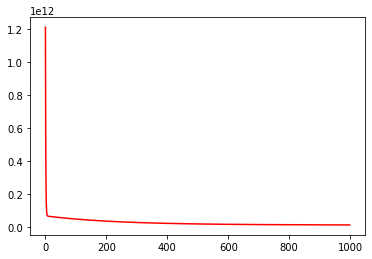

In [99]:
# courbe du nombre d'iterations
plt.plot(range(1000), cost_history,c='r',label='cost_history')

In [100]:
# a 400

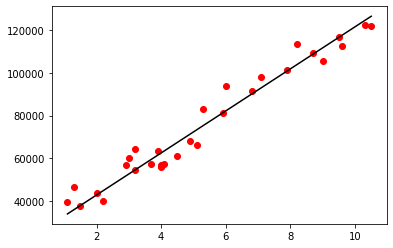

In [102]:
plt.scatter(x,y,c='r')
plt.plot(x,predictions,c='black')